In [2]:
library("tidyverse")
library("tidymodels")
library("readr")
library("skimr")
library("moderndive")
library("ISLR")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [6]:
evals_ch6 <- evals |> select(ID, score, age, gender)

evals_ch6 |> glimpse()

Rows: 463
Columns: 4
$ ID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …
$ score  <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.5, 4.6…
$ age    <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 40, 40,…
$ gender <fct> female, female, female, female, male, male, male, male, male, f…


In [7]:
evals_ch6 |> sample_n(8)

ID,score,age,gender
<int>,<dbl>,<int>,<fct>
336,3.1,60,male
369,4.2,38,male
182,4.4,47,female
374,3.6,47,female
40,2.5,51,female
382,4.4,38,female
292,3.9,32,male
430,4.5,33,male


In [9]:
evals_ch6 |> select(score, age, gender) |> skim()

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch6, score, ...
Number of rows             463                         
Number of columns          3                           
_______________________                                
Column type frequency:                                 
  factor                   1                           
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 mal: 268, fem: 195

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd   p0  p25  p50  p75 p100
1 scor

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [10]:
evals_ch6 |> filter(gender == "female") |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.2651758


In [11]:
evals_ch6 |> filter(gender == "male") |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.07645422


In [12]:
evals_ch6 |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.107032


`geom_smooth()` using formula = 'y ~ x'


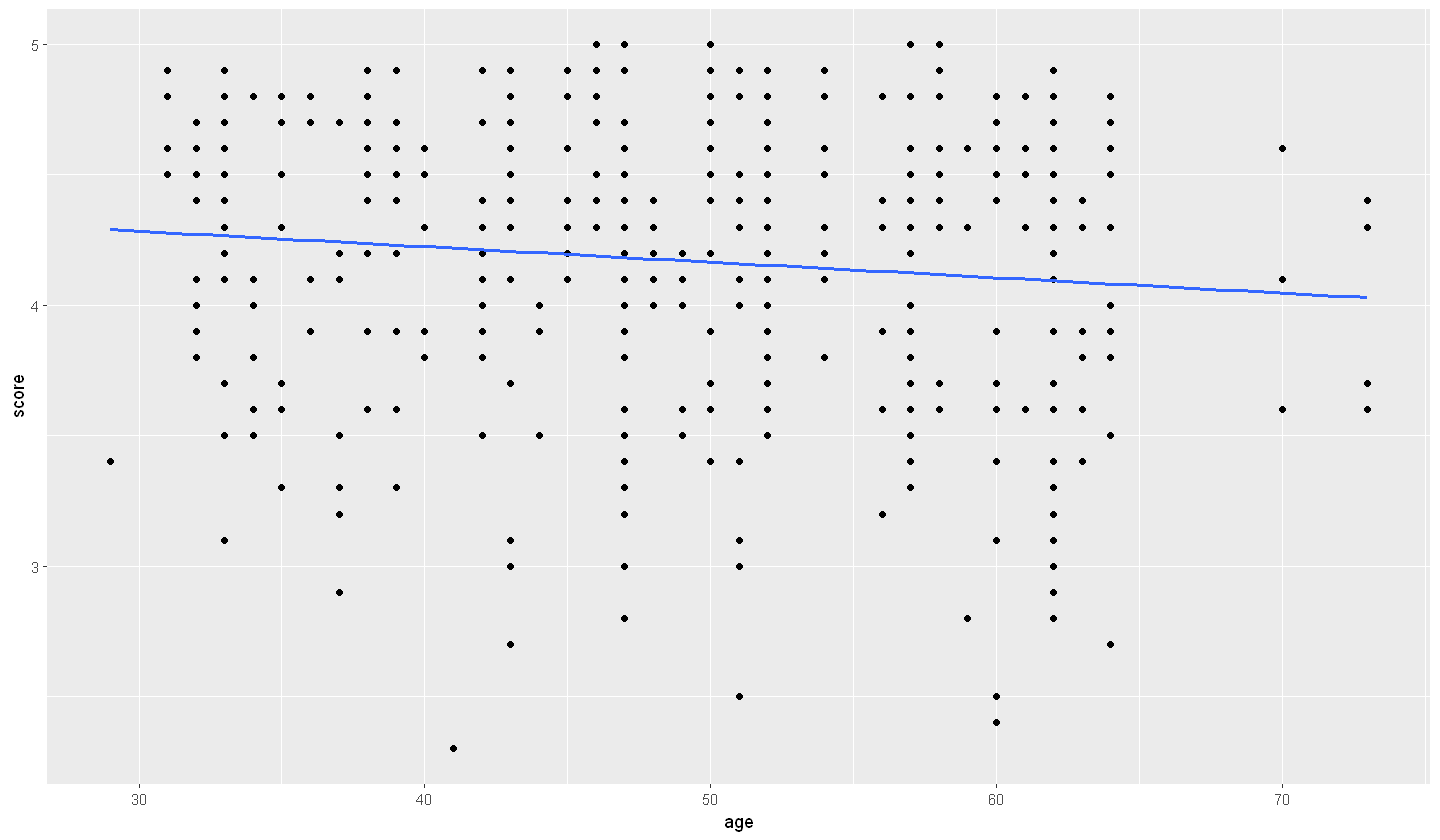

In [13]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(evals_ch6, aes(x = age, y = score)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


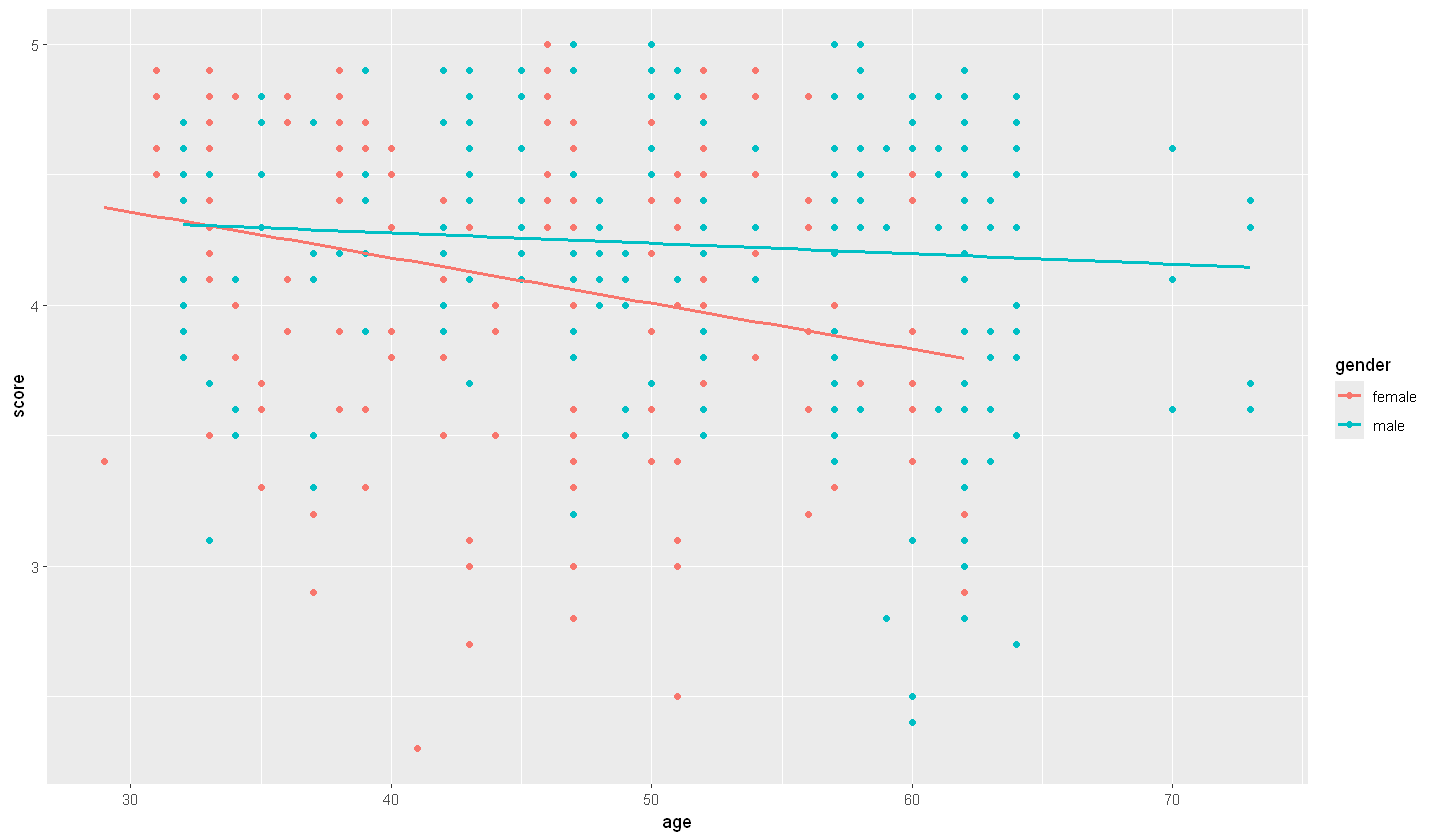

In [18]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(evals_ch6, aes(x = age, y = score, color = gender)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

In [17]:
score_model_interaction <- lm(score ~ age * gender, data = evals_ch6)
get_regression_table((score_model_interaction))

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,4.883,0.205,23.795,0.000,4.480,5.286
age,-0.018,0.004,-3.919,0.000,-0.026,-0.009
gender: male,-0.446,0.265,-1.681,0.094,-0.968,0.076
age:gendermale,0.014,0.006,2.446,0.015,0.003,0.024


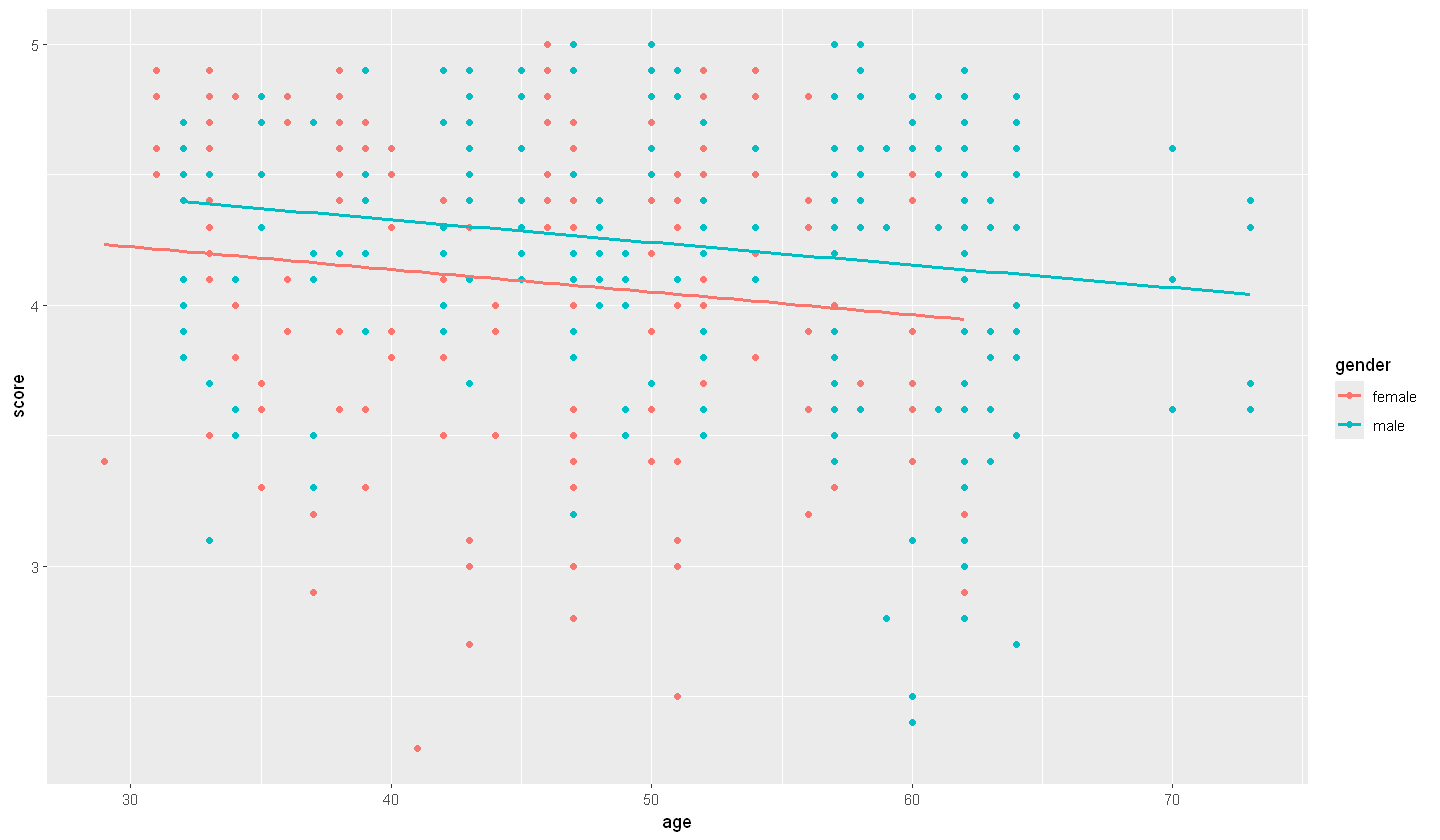

In [20]:
ggplot(evals_ch6, aes(x = age, y = score, color = gender)) +
  geom_point() +
  geom_parallel_slopes(se = FALSE)

In [21]:
score_model_parallel_slopes <- lm(score ~ age + gender, data = evals_ch6)
get_regression_table(score_model_parallel_slopes)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,4.484,0.125,35.792,0.000,4.238,4.730
age,-0.009,0.003,-3.280,0.001,-0.014,-0.003
gender: male,0.191,0.052,3.632,0.000,0.087,0.294
